In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk
import string
import re
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [2]:
url = "https://www.amazon.in/Test-Exclusive-2050-Multi-Storage/product-reviews/B086KF5SFQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
reviewlist = []

def get_soup(url):
    r = requests.get(url) # or....r = requests.get("http://localhost:8080/render.html", params = {"url" : url , "wait" :2}) 
    soup = BeautifulSoup(r.text, "html.parser")
    return soup

def get_reviews(soup):
    reviews = soup.find_all("div", {"data-hook" : "review"})    
    try:
        for item in reviews:
            review = {
            "title" : item.find("a", {"data-hook" : "review-title"}).text.strip(),
            "rating" : float(item.find("i", {"data-hook" : "review-star-rating"}).text.replace("out of 5 stars", "").strip()), # return starts values & float to replace this 3.0 out of 5 stars to this 3.0
            "body" : item.find("span", {"data-hook" : "review-body"}).text.strip(),
             }
            reviewlist.append(review)
    except:
        pass
    
for x in range(1,100):
    soup = get_soup("https://www.amazon.in/Test-Exclusive-2050-Multi-Storage/product-reviews/B086KF5SFQ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}")        
    print(f"Getting page:{x}")
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find("li", {"class" : "a-disabled a-last"}):
        pass
    else:
        break
            

Getting page:1
10
Getting page:2
20
Getting page:3
30
Getting page:4
30
Getting page:5
40
Getting page:6
40
Getting page:7
40
Getting page:8
50
Getting page:9
60
Getting page:10
70
Getting page:11
70
Getting page:12
70
Getting page:13
70
Getting page:14
80
Getting page:15
90
Getting page:16
100
Getting page:17
100
Getting page:18
100
Getting page:19
110
Getting page:20
120
Getting page:21
120
Getting page:22
120
Getting page:23
120
Getting page:24
130
Getting page:25
140
Getting page:26
150
Getting page:27
150
Getting page:28
150
Getting page:29
150
Getting page:30
150
Getting page:31
160
Getting page:32
170
Getting page:33
180
Getting page:34
180
Getting page:35
190
Getting page:36
200
Getting page:37
210
Getting page:38
220
Getting page:39
230
Getting page:40
230
Getting page:41
240
Getting page:42
240
Getting page:43
240
Getting page:44
250
Getting page:45
250
Getting page:46
260
Getting page:47
260
Getting page:48
260
Getting page:49
260
Getting page:50
260
Getting page:51
270
Gett

In [3]:
print(soup.title.text)

Amazon.in:Customer reviews: Samsung Galaxy S20 FE Cloud Navy, 8GB RAM, 128GB Storage


In [4]:
soup = get_soup("https://www.amazon.in/Test-Exclusive-2050-Multi-Storage/product-reviews/B086KF5SFQ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1")        
get_reviews(soup)
print(len(reviewlist))

490


In [5]:
df = pd.DataFrame(reviewlist)
df

title  rating  \
0                             Specs are not everything     4.0   
1                                                 good     4.0   
2    Excellent all-round phone; battery life can be...     4.0   
3                                 Amazon taper reviews     3.0   
4                                        EXTRA AWESOME     5.0   
..                                                 ...     ...   
485                         A Good Phone from Samsung!     4.0   
486                                       Good product     4.0   
487    Ear phones not included per product description     3.0   
488  Fantastic but its comes with some serious prob...     3.0   
489                            Very low battey back up     3.0   

                                                  body  
0    While choosing a new phone, I had  to consider...  
1                                          nice camera  
2    I have been using this phone for last four day...  
3    Jump to about the phone part in review but nee...  
4    One of the best mobile phone I have ever used....  
..                                                 ...  
485  I picked this phone for my daughter who wasn't...  
486                                               Nice  
487  Ear phones were part of the box per descriptio...  
488  Overall build quality and software experience ...  
489  After 15 days of usage, the battery back up is...  

[490 rows x 3 columns]

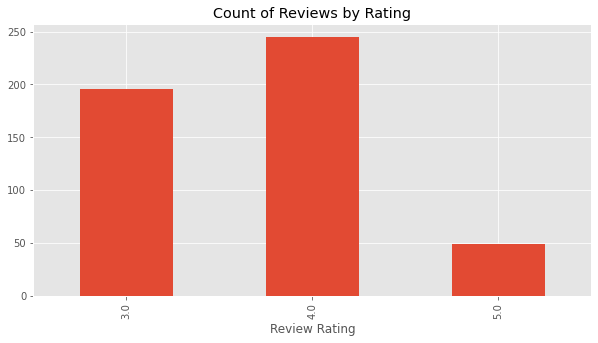

In [6]:
ax = df["rating"].value_counts().sort_index().plot(kind = "bar",
                                              title = "Count of Reviews by Rating" , 
                                              figsize = (10,5))
ax.set_xlabel("Review Rating")
plt.show()

In [7]:
df = [body.strip() for body in df.body] # remove both the leading and the trailing characters
df = [body for body in df if body] # removes empty strings, because they are considered in Python as False
df[0:10]

["While choosing a new phone, I had  to consider a lot of things. I thought about going with OnePlus Nord 2 but after a lot of back and forth, I choosed this. There were great things about this phone,I'll mention them one by one.Display- The first plus point will of course be the display,it's 120hz, 2400*1080, which is plenty according to me, as I cannot see the difference between quad hd,it's plenty bright, HDR 10+, and overall great.Camera- This was a big deciding factor, having used OnePlus camera, there were some things lacking, I was expecting it to perform pretty well. Now megapixels are not everything, but I can't help but notice that the 8mp telephoto camera is a lot softer than the main and ultrawide. But at this price range, the photos are stunning and amazing, it's nice that samsung decided to put a telephoto instead of depth or macro which are useless. You get plenty software tricks like single take and live focus video, which work better than expected, and taking the price

In [8]:
# Joining the list into one string/text
text = ' '.join(df)
text

"While choosing a new phone, I had  to consider a lot of things. I thought about going with OnePlus Nord 2 but after a lot of back and forth, I choosed this. There were great things about this phone,I'll mention them one by one.Display- The first plus point will of course be the display,it's 120hz, 2400*1080, which is plenty according to me, as I cannot see the difference between quad hd,it's plenty bright, HDR 10+, and overall great.Camera- This was a big deciding factor, having used OnePlus camera, there were some things lacking, I was expecting it to perform pretty well. Now megapixels are not everything, but I can't help but notice that the 8mp telephoto camera is a lot softer than the main and ultrawide. But at this price range, the photos are stunning and amazing, it's nice that samsung decided to put a telephoto instead of depth or macro which are useless. You get plenty software tricks like single take and live focus video, which work better than expected, and taking the price 

In [9]:
# nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Shivani
[nltk_data]     Bhavsar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#Remove Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
no_punc_text

'While choosing a new phone I had  to consider a lot of things I thought about going with OnePlus Nord 2 but after a lot of back and forth I choosed this There were great things about this phoneIll mention them one by oneDisplay The first plus point will of course be the displayits 120hz 24001080 which is plenty according to me as I cannot see the difference between quad hdits plenty bright HDR 10 and overall greatCamera This was a big deciding factor having used OnePlus camera there were some things lacking I was expecting it to perform pretty well Now megapixels are not everything but I cant help but notice that the 8mp telephoto camera is a lot softer than the main and ultrawide But at this price range the photos are stunning and amazing its nice that samsung decided to put a telephoto instead of depth or macro which are useless You get plenty software tricks like single take and live focus video which work better than expected and taking the price I would say its the best in the 36

In [11]:
no_punc_text = re.sub("[^A-Za-z" "]+"," ",no_punc_text).lower() #remove special character
# no_punc_text = re.sub("[0-9" "]+"," ",no_punc_text) #remove numbers
# no_punc_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', no_punc_text).lower() #remove hyperlink
no_punc_text

'while choosing a new phone i had to consider a lot of things i thought about going with oneplus nord but after a lot of back and forth i choosed this there were great things about this phoneill mention them one by onedisplay the first plus point will of course be the displayits hz which is plenty according to me as i cannot see the difference between quad hdits plenty bright hdr and overall greatcamera this was a big deciding factor having used oneplus camera there were some things lacking i was expecting it to perform pretty well now megapixels are not everything but i cant help but notice that the mp telephoto camera is a lot softer than the main and ultrawide but at this price range the photos are stunning and amazing its nice that samsung decided to put a telephoto instead of depth or macro which are useless you get plenty software tricks like single take and live focus video which work better than expected and taking the price i would say its the best in the k pricesoftware i am 

In [12]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['while', 'choosing', 'a', 'new', 'phone', 'i', 'had', 'to', 'consider', 'a', 'lot', 'of', 'things', 'i', 'thought', 'about', 'going', 'with', 'oneplus', 'nord', 'but', 'after', 'a', 'lot', 'of', 'back', 'and', 'forth', 'i', 'choosed', 'this', 'there', 'were', 'great', 'things', 'about', 'this', 'phoneill', 'mention', 'them', 'one', 'by', 'onedisplay', 'the', 'first', 'plus', 'point', 'will', 'of', 'course']


In [13]:
len(text_tokens)

91385

In [14]:
fd_tokens = FreqDist(text_tokens)
fd_tokens.most_common(10)

[('the', 3381),
 ('is', 2597),
 ('i', 2107),
 ('a', 1960),
 ('to', 1813),
 ('and', 1666),
 ('it', 1568),
 ('of', 1470),
 ('but', 1274),
 ('this', 1274)]

In [15]:
#importing given stopwords file
with open("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\stop.txt") as stop_words:
    stop_words = stop_words.read()
    print(stop_words)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [16]:
stop_tokens = [word for word in text_tokens if not word in stop_words]
print(stop_tokens[0:40])

['choosing', 'phone', 'lot', 'things', 'thought', 'oneplus', 'nord', 'lot', 'back', 'choosed', 'great', 'things', 'phoneill', 'mention', 'onedisplay', 'point', 'displayits', 'hz', 'plenty', 'difference', 'quad', 'hdits', 'plenty', 'bright', 'hdr', 'greatcamera', 'big', 'deciding', 'factor', 'oneplus', 'camera', 'things', 'lacking', 'expecting', 'perform', 'pretty', 'megapixels', 'notice', 'telephoto', 'camera']


In [17]:
# Joinining all the reviews into single paragraph 
stop_string = " ".join(stop_tokens)
stop_string
#for wordcloud

'choosing phone lot things thought oneplus nord lot back choosed great things phoneill mention onedisplay point displayits hz plenty difference quad hdits plenty bright hdr greatcamera big deciding factor oneplus camera things lacking expecting perform pretty megapixels notice telephoto camera lot softer ultrawide price range photos stunning amazing nice samsung decided put telephoto depth macro useless plenty software tricks single live focus video work expected taking price pricesoftware biggest fan inclined stock oneplus oxygen exists software tricks makes feel samsung phone feature stands samsung dex expect dex finally made realise level polish windows desktop tv asthetic meits prefer stockperformance talked negetive aspect phone exynos processing inferior snapdragon considers price processor find note ultra find sd price performance problem battery life hrs screen great huge asterisk overheating experienced overheating dex dont heavy work phone laptop fps drops goodbuild phone pla

In [18]:
# Normalize the data
lower_words=[body.lower() for body in stop_tokens]
print(lower_words)

['choosing', 'phone', 'lot', 'things', 'thought', 'oneplus', 'nord', 'lot', 'back', 'choosed', 'great', 'things', 'phoneill', 'mention', 'onedisplay', 'point', 'displayits', 'hz', 'plenty', 'difference', 'quad', 'hdits', 'plenty', 'bright', 'hdr', 'greatcamera', 'big', 'deciding', 'factor', 'oneplus', 'camera', 'things', 'lacking', 'expecting', 'perform', 'pretty', 'megapixels', 'notice', 'telephoto', 'camera', 'lot', 'softer', 'ultrawide', 'price', 'range', 'photos', 'stunning', 'amazing', 'nice', 'samsung', 'decided', 'put', 'telephoto', 'depth', 'macro', 'useless', 'plenty', 'software', 'tricks', 'single', 'live', 'focus', 'video', 'work', 'expected', 'taking', 'price', 'pricesoftware', 'biggest', 'fan', 'inclined', 'stock', 'oneplus', 'oxygen', 'exists', 'software', 'tricks', 'makes', 'feel', 'samsung', 'phone', 'feature', 'stands', 'samsung', 'dex', 'expect', 'dex', 'finally', 'made', 'realise', 'level', 'polish', 'windows', 'desktop', 'tv', 'asthetic', 'meits', 'prefer', 'stockpe

In [19]:
# Stemming (Optional)
# from nltk.stem import PorterStemmer
# ps=PorterStemmer()
# stemmed_tokens=[ps.stem(word) for word in lower_words]
# print(stemmed_tokens)

In [20]:
# Lemmatization
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

choosing phone lot things thought oneplus nord lot back choosed great things phoneill mention onedisplay point displayits hz plenty difference quad hdits plenty bright hdr greatcamera big deciding factor oneplus camera things lacking expecting perform pretty megapixels notice telephoto camera lot softer ultrawide price range photos stunning amazing nice samsung decided put telephoto depth macro useless plenty software tricks single live focus video work expected taking price pricesoftware biggest fan inclined stock oneplus oxygen exists software tricks makes feel samsung phone feature stands samsung dex expect dex finally made realise level polish windows desktop tv asthetic meits prefer stockperformance talked negetive aspect phone exynos processing inferior snapdragon considers price processor find note ultra find sd price performance problem battery life hrs screen great huge asterisk overheating experienced overheating dex dont heavy work phone laptop fps drops goodbuild phone plas

In [21]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['choose', 'phone', 'lot', 'thing', 'think', 'oneplus', 'nord', 'lot', 'back', 'choose', 'great', 'thing', 'phoneill', 'mention', 'onedisplay', 'point', 'displayit', 'hz', 'plenty', 'difference', 'quad', 'hdit', 'plenty', 'bright', 'hdr', 'greatcamera', 'big', 'decide', 'factor', 'oneplus', 'camera', 'thing', 'lack', 'expect', 'perform', 'pretty', 'megapixel', 'notice', 'telephoto', 'camera', 'lot', 'soft', 'ultrawide', 'price', 'range', 'photo', 'stun', 'amazing', 'nice', 'samsung', 'decided', 'put', 'telephoto', 'depth', 'macro', 'useless', 'plenty', 'software', 'trick', 'single', 'live', 'focus', 'video', 'work', 'expect', 'take', 'price', 'pricesoftware', 'big', 'fan', 'incline', 'stock', 'oneplus', 'oxygen', 'exist', 'software', 'trick', 'make', 'feel', 'samsung', 'phone', 'feature', 'stand', 'samsung', 'dex', 'expect', 'dex', 'finally', 'make', 'realise', 'level', 'polish', 'window', 'desktop', 'tv', 'asthetic', 'meit', 'prefer', 'stockperformance', 'talk', 'negetive', 'aspect', 

In [22]:
clean_reviews=' '.join(lemmas)
clean_reviews

'choose phone lot thing think oneplus nord lot back choose great thing phoneill mention onedisplay point displayit hz plenty difference quad hdit plenty bright hdr greatcamera big decide factor oneplus camera thing lack expect perform pretty megapixel notice telephoto camera lot soft ultrawide price range photo stun amazing nice samsung decided put telephoto depth macro useless plenty software trick single live focus video work expect take price pricesoftware big fan incline stock oneplus oxygen exist software trick make feel samsung phone feature stand samsung dex expect dex finally make realise level polish window desktop tv asthetic meit prefer stockperformance talk negetive aspect phone exynos process inferior snapdragon consider price processor find note ultra find sd price performance problem battery life hrs screen great huge asterisk overheat experienced overheating dex do not heavy work phone laptop fps drop goodbuild phone plastic backand prefer glass matte love glossy glass 

## Feature Extraction :
## 1. Using CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'choose': 64, 'phone': 293, 'lot': 221, 'thing': 412, 'think': 413, 'oneplus': 269, 'nord': 259, 'back': 24, 'great': 163, 'phoneill': 296, 'mention': 236, 'onedisplay': 268, 'point': 304, 'displayit': 99, 'hz': 184, 'plenty': 302, 'difference': 94, 'quad': 329, 'hdit': 169, 'bright': 41, 'hdr': 170, 'greatcamera': 164, 'big': 36, 'decide': 84, 'factor': 127, 'camera': 52, 'lack': 209, 'expect': 121, 'perform': 289, 'pretty': 311, 'megapixel': 233, 'notice': 262, 'telephoto': 408, 'soft': 386, 'ultrawide': 424, 'price': 312, 'range': 335, 'photo': 297, 'stun': 399, 'amazing': 6, 'nice': 254, 'samsung': 357, 'decided': 85, 'put': 328, 'depth': 88, 'macro': 225, 'useless': 431, 'software': 387, 'trick': 419, 'single': 376, 'live': 220, 'focus': 145, 'video': 437, 'work': 453, 'take': 404, 'pricesoftware': 314, 'fan': 129, 'incline': 193, 'stock': 393, 'oxygen': 281, 'exist': 119, 'make': 227, 'feel': 134, 'feature': 131, 'stand': 391, 'dex': 93, 'finally': 137, 'realise': 338, 'level': 

In [24]:
print(cv.get_feature_names()[100:300])

['do', 'drain', 'drop', 'dual', 'dualstandby', 'due', 'duration', 'dynamic', 'early', 'earphone', 'ecosystem', 'edge', 'efficiency', 'email', 'energy', 'exceedingly', 'excellent', 'exino', 'exinos', 'exist', 'expandable', 'expect', 'experience', 'experienced', 'exynos', 'face', 'faceunlock', 'factor', 'family', 'fan', 'fast', 'feature', 'fedup', 'feedback', 'feel', 'fhd', 'fill', 'finally', 'find', 'finger', 'fix', 'fixedfrom', 'flagship', 'flash', 'flawed', 'focus', 'fps', 'frame', 'front', 'galaxy', 'game', 'gamerlast', 'gaming', 'gandroid', 'gb', 'ghz', 'glass', 'glitch', 'global', 'glossy', 'good', 'goodbuild', 'goodthe', 'great', 'greatcamera', 'handy', 'happy', 'have', 'hd', 'hdit', 'hdr', 'heated', 'heating', 'heatinghad', 'heavy', 'high', 'hold', 'honest', 'hour', 'hrs', 'huge', 'hybrid', 'hype', 'hypend', 'hz', 'image', 'immersive', 'impactful', 'impressionsprosdisplay', 'improvement', 'inbox', 'inch', 'incidentally', 'incline', 'include', 'indoor', 'inferior', 'instance', 'in

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print(reviewscv.toarray()[100:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(reviewscv.toarray().shape)

(38759, 459)


##  2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [27]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [28]:
print(cv_ngram_range.get_feature_names())

['awesome', 'back', 'battery', 'build', 'buy', 'call', 'camera', 'case', 'daughter', 'day', 'device', 'dex', 'difference', 'display', 'do', 'dual', 'dynamic', 'edge', 'excellent', 'exist', 'expandable', 'expect', 'experience', 'exynos', 'factor', 'feature', 'feel', 'finally', 'find', 'flagship', 'front', 'ghz', 'good', 'goodthe', 'great', 'happy', 'hdr', 'heating', 'heavy', 'hrs', 'hz', 'image', 'include', 'ip', 'iqoo', 'issue', 'last', 'legend', 'life', 'lot', 'make', 'mention', 'month', 'nice', 'nonremovable', 'nord', 'not', 'notice', 'ois', 'oneplus', 'pd', 'performance', 'phone', 'pixel', 'plastic', 'plenty', 'prefer', 'price', 'problem', 'processor', 'purchase', 'put', 'quad', 'quality', 'randomly', 'rate', 'rear', 'regret', 'return', 'review', 'run', 'samsung', 'screen', 'scroll', 'sell', 'sim', 'single', 'software', 'telephoto', 'thing', 'ultra', 'update', 'user', 'video', 'warm', 'wide', 'wireless', 'work', 'year', 'youtube']


In [29]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 3. TF-IDF Vectorizer :

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [31]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['accessory', 'account', 'adapter', 'address', 'algorithms', 'aluminium', 'amazing', 'amazon', 'amazonthank', 'amd', 'amole', 'android', 'angle', 'app', 'apple', 'area', 'aspect', 'assume', 'asterisk', 'asthetic', 'audio', 'awesome', 'awesomelong', 'awesomenothe', 'back', 'backand', 'backupawesome', 'backwill', 'bad', 'base', 'battery', 'be', 'beat', 'beforr', 'behindgame', 'belowthere', 'big', 'blink', 'box', 'brand', 'brick', 'bright', 'brightness', 'browse', 'buck', 'bud', 'bug', 'build', 'buy', 'cable', 'call', 'calling', 'camera', 'capacitive', 'card', 'care', 'case', 'centimeter', 'certify', 'charge', 'cheap', 'check', 'chipset', 'choice', 'choose', 'close', 'colour', 'complain', 'compromise', 'condition', 'confidence', 'confirm', 'consider', 'core', 'coursethe', 'craze', 'customer', 'daily', 'damagededit', 'darkalso', 'date', 'daughter', 'day', 'decent', 'decide', 'decided', 'delight', 'delivery', 'depth', 'description', 'desktop', 'detailstriple', 'device', 'dex', 'difference',

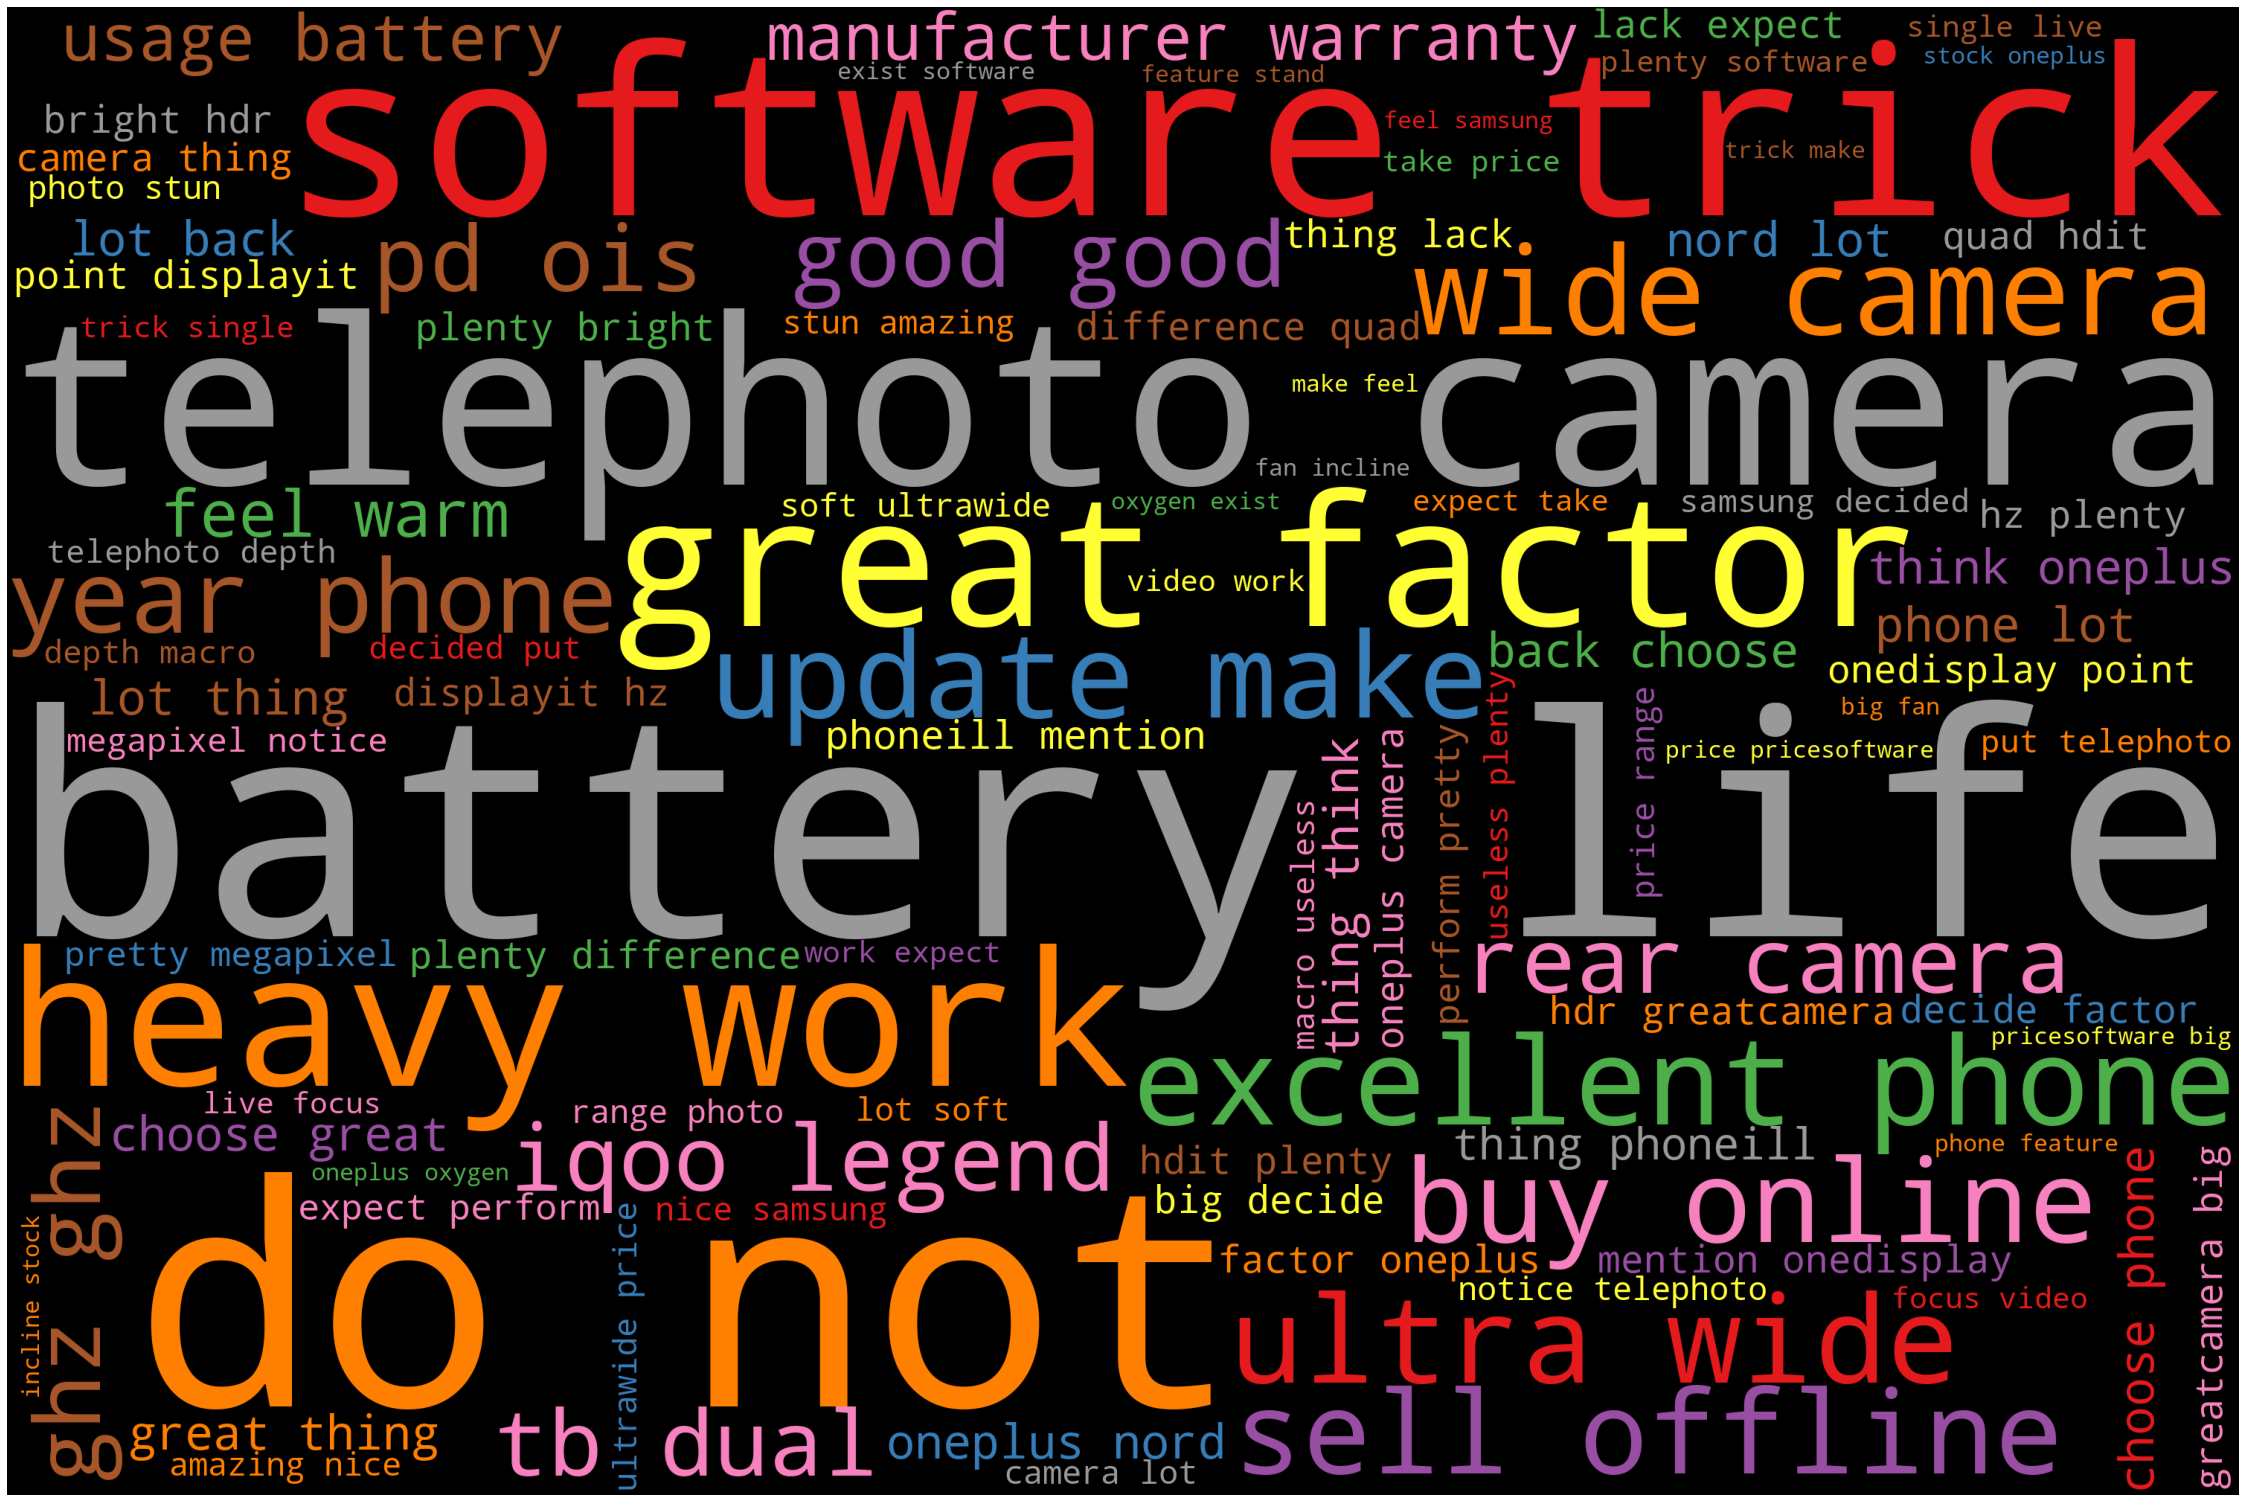

In [32]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

# STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set1',stopwords=stop_words).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition(NER)

> 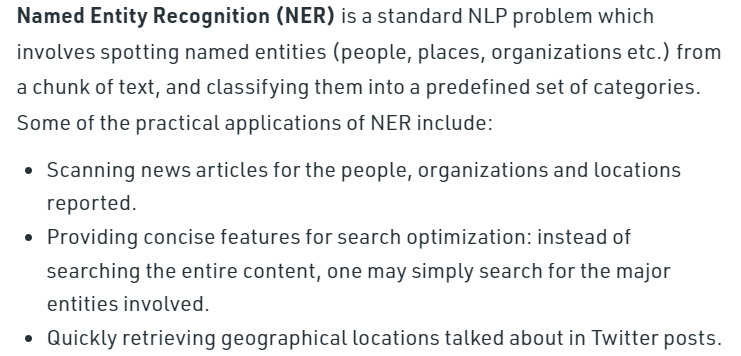

In [33]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [34]:
for token in doc_block[100:200]:
    print(token,token.pos_)

negetive ADJ
aspect NOUN
phone NOUN
exynos PROPN
process NOUN
inferior ADJ
snapdragon NOUN
consider VERB
price NOUN
processor NOUN
find AUX
note VERB
ultra ADJ
find VERB
sd NOUN
price NOUN
performance NOUN
problem NOUN
battery NOUN
life NOUN
hrs NOUN
screen NOUN
great ADJ
huge ADJ
asterisk NOUN
overheat NOUN
experienced VERB
overheating ADJ
dex NOUN
do AUX
not PART
heavy ADJ
work NOUN
phone NOUN
laptop NOUN
fps NOUN
drop VERB
goodbuild ADJ
phone NOUN
plastic NOUN
backand NOUN
prefer VERB
glass NOUN
matte NOUN
love NOUN
glossy ADJ
glass NOUN
shatter NOUN
resistance NOUN
case NOUN
great ADJ
factor NOUN
ip NOUN
rare ADJ
price NOUN
wireless ADJ
reverse ADJ
wireless ADJ
charge NOUN
invest X
samsung PROPN
ecosystem PROPN
bud PROPN
watch NOUN
charge VERB
back ADP
phoneanother NOUN
mention VERB
pack VERB
sketchy ADJ
seal NOUN
damagededit NOUN
week NOUN
notice NOUN
camera NOUN
quality NOUN
nice ADJ
due ADJ
samsung PROPN
image NOUN
processing NOUN
algorithms NOUN
video NOUN
quality NOUN
poor ADJ

In [35]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['resistance', 'case', 'factor', 'ip', 'price', 'charge', 'watch', 'charge', 'phoneanother', 'mention', 'pack', 'seal', 'damagededit', 'week', 'notice', 'camera', 'quality', 'image', 'processing', 'algorithms', 'video', 'quality', 'rainbowe', 'darkalso', 'software', 'bug', 'camera', 'mute', 'call', 'camera', 'phone', 'day', 'phone', 'battery', 'life', 'impressionsprosdisplay', 'watching', 'video', 'phone', 'zoom', 'fill', 'stereo', 'audio', 'make', 'display', 'support', 'hdr', 'hdr', 'confirm', 'play', 'youtube', 'hdr', 'make', 'lot', 'difference', 'phone', 'screen', 'type', 'scroll', 'camera', 'image', 'find', 'camera', 'telephoto', 'camera', 'quality', 'camera', 'angle', 'produce', 'image', 'noise', 'edge', 'performance', 'phone', 'phone', 'nifty', 'feature', 'pop', 'sms', 'work', 'edge', 'panel', 'onbuild', 'quality', 'ip', 'certify', 'plastic', 'case', 'life', 'area', 'misgiving', 'call', 'email', 'browse', 'video', 'camera', 'game', 'sot', 'hour', 'battery']


In [36]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0     phone   1323
1    camera    931
2   battery    637
3       buy    392
4     price    343
5  software    343
6      make    343
7    review    343
8       day    294
9    update    294

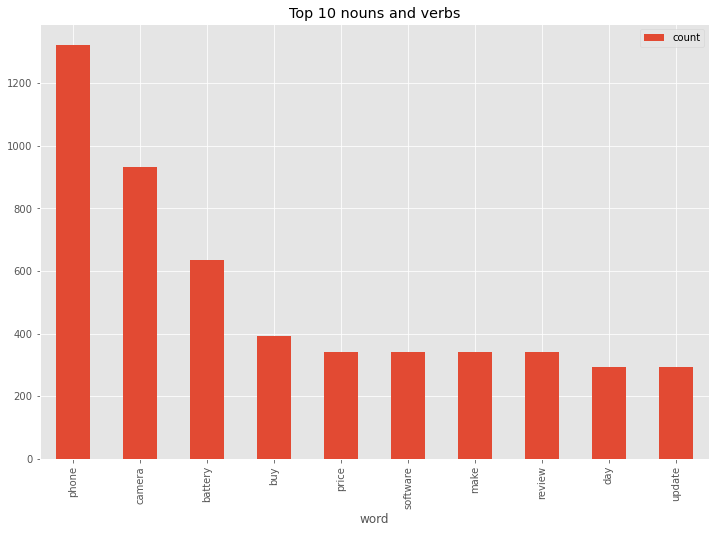

In [37]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [38]:
#Tokenization
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(df))
sentences

['While choosing a new phone, I had  to consider a lot of things.',
 'I thought about going with OnePlus Nord 2 but after a lot of back and forth, I choosed this.',
 "There were great things about this phone,I'll mention them one by one.Display- The first plus point will of course be the display,it's 120hz, 2400*1080, which is plenty according to me, as I cannot see the difference between quad hd,it's plenty bright, HDR 10+, and overall great.Camera- This was a big deciding factor, having used OnePlus camera, there were some things lacking, I was expecting it to perform pretty well.",
 "Now megapixels are not everything, but I can't help but notice that the 8mp telephoto camera is a lot softer than the main and ultrawide.",
 "But at this price range, the photos are stunning and amazing, it's nice that samsung decided to put a telephoto instead of depth or macro which are useless.",
 "You get plenty software tricks like single take and live focus video, which work better than expected, 

In [39]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     While choosing a new phone, I had  to consider...
1     I thought about going with OnePlus Nord 2 but ...
2     There were great things about this phone,I'll ...
3     Now megapixels are not everything, but I can't...
4     But at this price range, the photos are stunni...
...                                                 ...
3572  Even after normal usage, the battery is not la...
3573                Very disappointed with the product.
3574    Return window closed within 1 week of delivery.
3575                        Hence can't return as well.
3576                             Stuck with this phone.

[3577 rows x 1 columns]

In [52]:
Affin = pd.read_csv(r"C:\Users\Shivani Bhavsar\OneDrive\Documents\ExcelR Assignment files\DS\A11 Text Mining\AFINN-en-165.txt" , sep="\t")

Affin.columns = ["Word" , "Value"]

Affin.to_csv(r"C:\Users\Shivani Bhavsar\OneDrive\Documents\ExcelR Assignment files\DS\A11 Text Mining\AFINN-en-165.csv", index = None)
Affin

Word  Value
0      abandoned     -2
1       abandons     -2
2       abducted     -2
3      abduction     -2
4     abductions     -2
...          ...    ...
3376       yucky     -2
3377       yummy      3
3378      zealot     -2
3379     zealots     -2
3380     zealous      2

[3381 rows x 2 columns]

In [54]:
affinity_scores=Affin.set_index('Word')['Value'].to_dict()
affinity_scores

{'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'ac

In [55]:
# Custom function: score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [58]:
# manual testing
calculate_sentiment(text='Unhappy')

0

In [59]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       7
3       2
4       9
       ..
3572    0
3573   -2
3574    0
3575    0
3576    0
Name: sentiment_value, Length: 3577, dtype: int64

In [60]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       13
1       19
2       69
3       25
4       28
        ..
3572    14
3573     5
3574     8
3575     5
3576     4
Name: word_count, Length: 3577, dtype: int64

In [61]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
2136  Too bad, there is no proper case available yet...               -6   
3231  Too bad, there is no proper case available yet...               -6   
895   Too bad, there is no proper case available yet...               -6   
2939  Too bad, there is no proper case available yet...               -6   
1552  Too bad, there is no proper case available yet...               -6   
...                                                 ...              ...   
2613  Peace ✌️ One of the best mobile phone I have e...               18   
277   Peace ✌️ One of the best mobile phone I have e...               18   
131   Peace ✌️ One of the best mobile phone I have e...               18   
569   Peace ✌️ One of the best mobile phone I have e...               18   
3270  Peace ✌️ One of the best mobile phone I have e...               18   

      word_count  
2136          25  
3231          25  
895           25  
2939          25  
1552          25  
...          ...  
2613          50  
277           50  
131           50  
569           50  
3270          50  

[3577 rows x 3 columns]

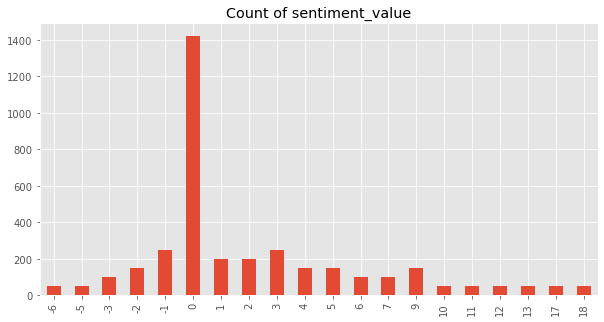

In [70]:
sent_df["sentiment_value"].value_counts().sort_index().plot(kind = "bar",
                                              title = "Count of sentiment_value" , 
                                              figsize = (10,5))
ax.set_xlabel("sentiment_value")
plt.show()

In [62]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    3577.000000
mean        2.191781
std         4.523504
min        -6.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        18.000000
Name: sentiment_value, dtype: float64

In [63]:
# negative(-) and nutral(0) sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0     While choosing a new phone, I had  to consider...                0   
1     I thought about going with OnePlus Nord 2 but ...                0   
6     But there is a reason it exists, there are man...                0   
8     but the overall asthetic of the os is not for ...               -5   
15    Watching videos on the phone (with zoom to fil...                0   
...                                                 ...              ...   
3572  Even after normal usage, the battery is not la...                0   
3573                Very disappointed with the product.               -2   
3574    Return window closed within 1 week of delivery.                0   
3575                        Hence can't return as well.                0   
3576                             Stuck with this phone.                0   

      word_count  
0             13  
1             19  
6             23  
8             76  
15            18  
...          ...  
3572          14  
3573           5  
3574           8  
3575           5  
3576           4  

[2009 rows x 3 columns]

In [64]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2     There were great things about this phone,I'll ...                7   
3     Now megapixels are not everything, but I can't...                2   
4     But at this price range, the photos are stunni...                9   
5     You get plenty software tricks like single tak...               11   
7     I would not go into everything, but one featur...                2   
...                                                 ...              ...   
3567  The first thing i do with any new phone is put...                5   
3568  While people say the latter is better - I dont...               10   
3569  The screen is good with very good colour repro...                9   
3570  Nice Ear phones were part of the box per descr...               12   
3571  I think Samsung either used cheap material for...                9   

      word_count  
2             69  
3             25  
4             28  
5             53  
7             45  
...          ...  
3567          77  
3568          69  
3569          15  
3570         227  
3571          95  

[1568 rows x 3 columns]

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

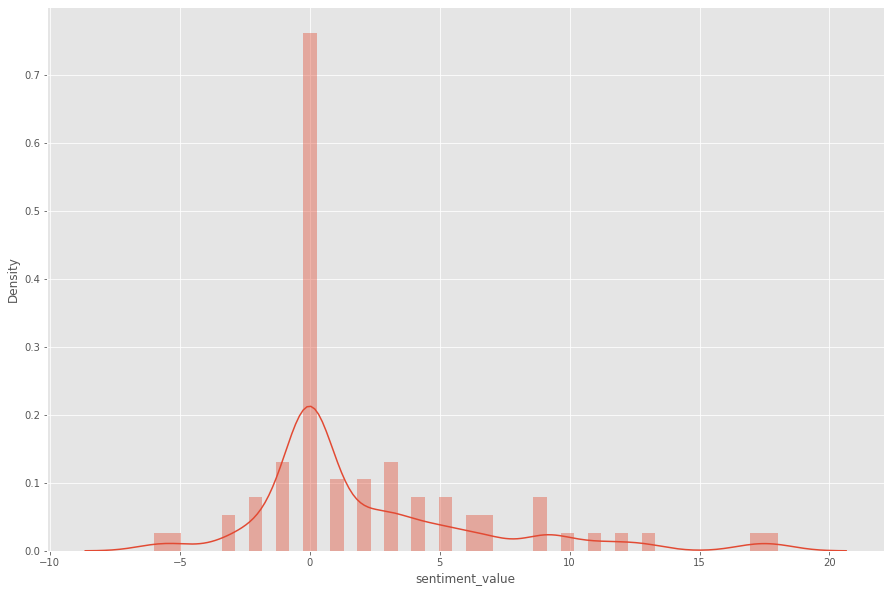

In [65]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

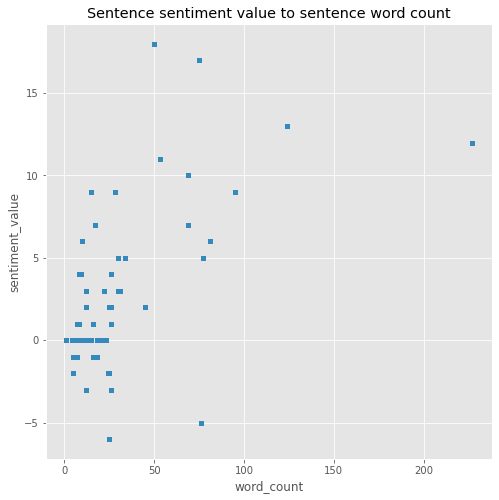

In [72]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')
plt.show()